# Context
### "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."
#### The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models.

##### Each row represents a customer, each column contains customer’s attributes. The datasets have the following attributes or features:

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #Advanced data visualization
import matplotlib.pyplot as plt #data visualization

In [5]:
data = pd.read_csv("C:/Users/Charanteja/Downloads/Data_set_telecom_churn.csv")

In [7]:
data.head() #Top n rows of dataset

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [9]:
data.info() #dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   VMail Message   3333 non-null   int64  
 2   Day Mins        3333 non-null   float64
 3   Eve Mins        3333 non-null   float64
 4   Night Mins      3333 non-null   float64
 5   Intl Mins       3333 non-null   float64
 6   CustServ Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Int'l Plan      3333 non-null   int64  
 9   VMail Plan      3333 non-null   int64  
 10  Day Calls       3333 non-null   int64  
 11  Day Charge      3333 non-null   float64
 12  Eve Calls       3333 non-null   int64  
 13  Eve Charge      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   f

In [10]:
data.describe() # Summary statistics of numerical columns

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [11]:
data.shape #data size

(3333, 21)

In [12]:
data.dtypes #data types

Account Length      int64
VMail Message       int64
Day Mins          float64
Eve Mins          float64
Night Mins        float64
Intl Mins         float64
CustServ Calls      int64
Churn               int64
Int'l Plan          int64
VMail Plan          int64
Day Calls           int64
Day Charge        float64
Eve Calls           int64
Eve Charge        float64
Night Calls         int64
Night Charge      float64
Intl Calls          int64
Intl Charge       float64
State              object
Area Code           int64
Phone              object
dtype: object

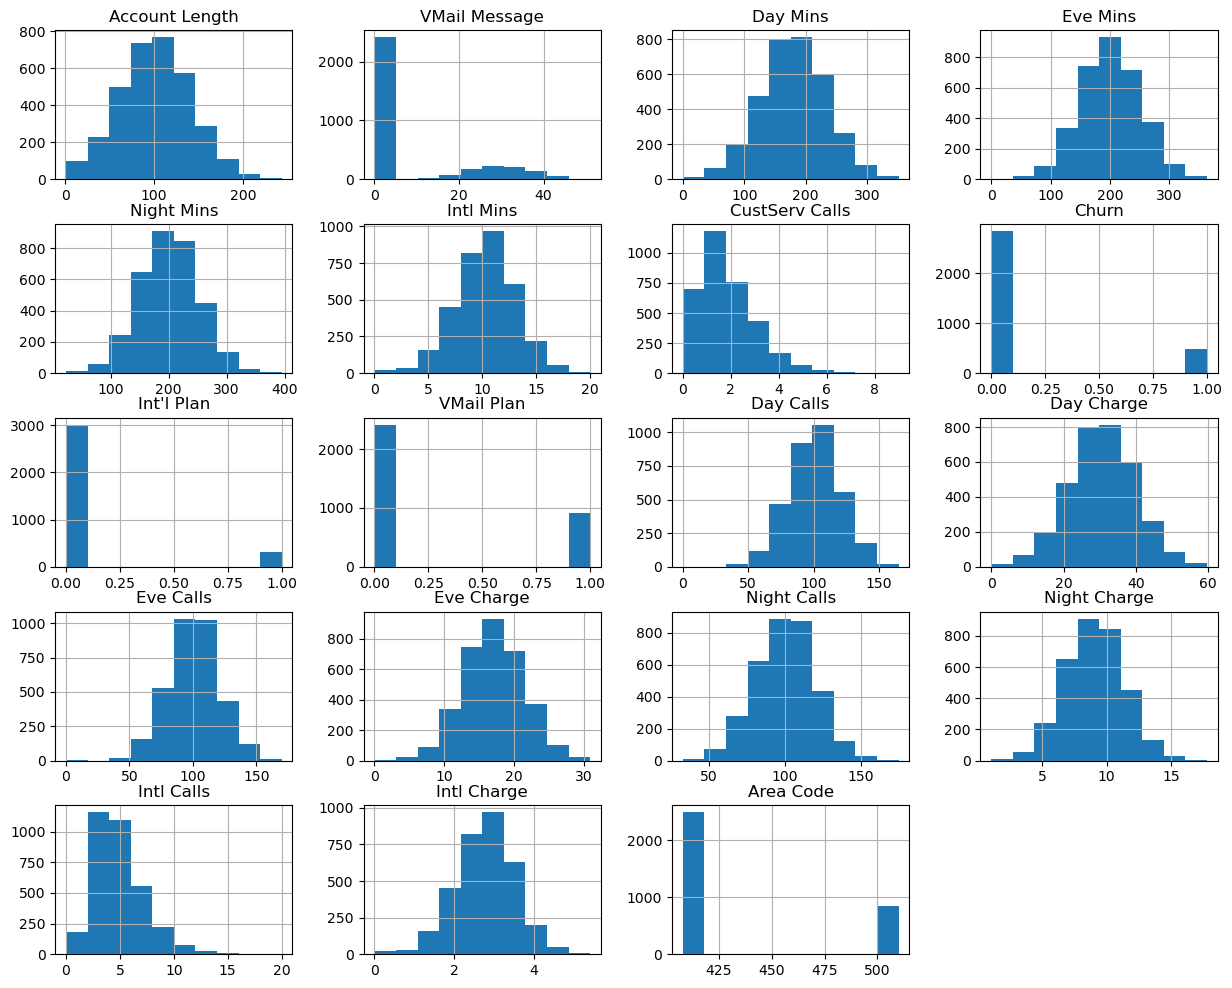

In [13]:
data.hist(figsize=(15, 12))
plt.show()

<Axes: >

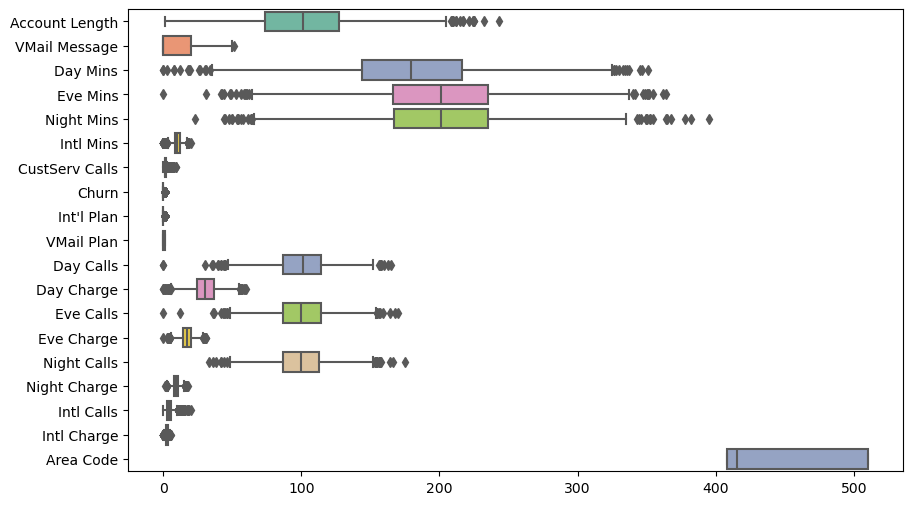

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient="h", palette="Set2")

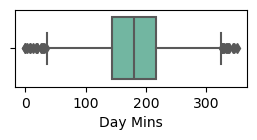

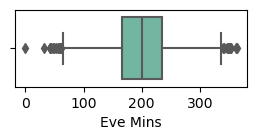

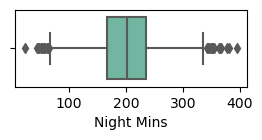

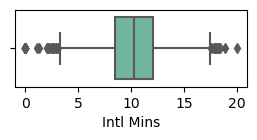

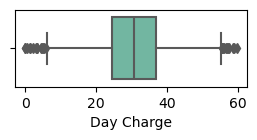

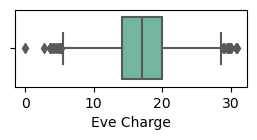

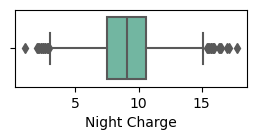

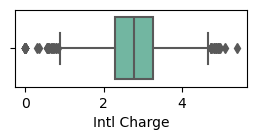

In [30]:
# Box plots to identify outliers
for col_name in data.columns:
    if (data[col_name].dtypes==int) or (data[col_name].dtypes==float):
        plt.figure(figsize=(3, 1))
        sns.boxplot(x=col_name, data=data, orient="h", palette="Set2")
        plt.show()

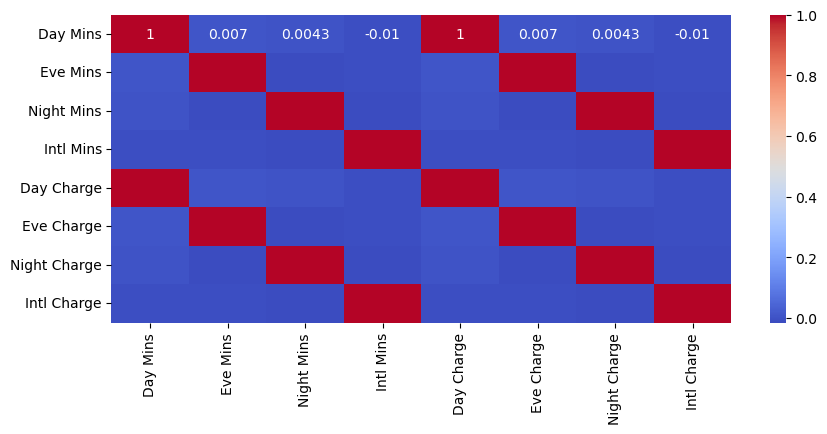

In [57]:
collist = []
for col_name in data.columns:
    if (data[col_name].dtypes==int) or (data[col_name].dtypes==float):
       collist.append(col_name)
correlation_matrix = data[collist].corr()


# Heatmap of the correlation matrix
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

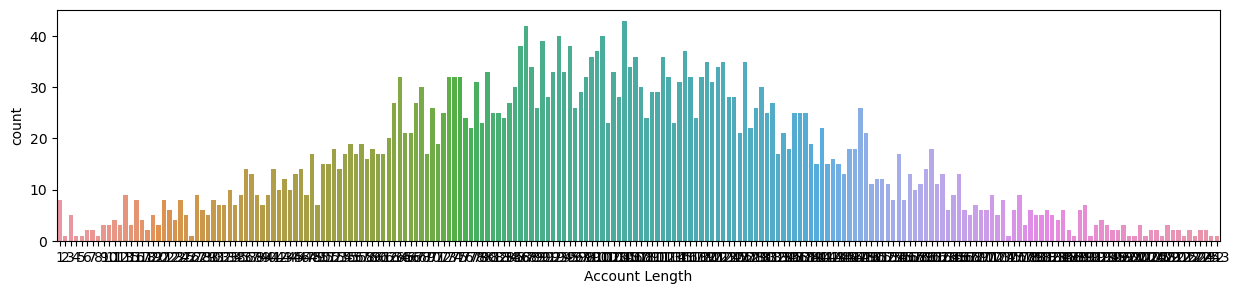

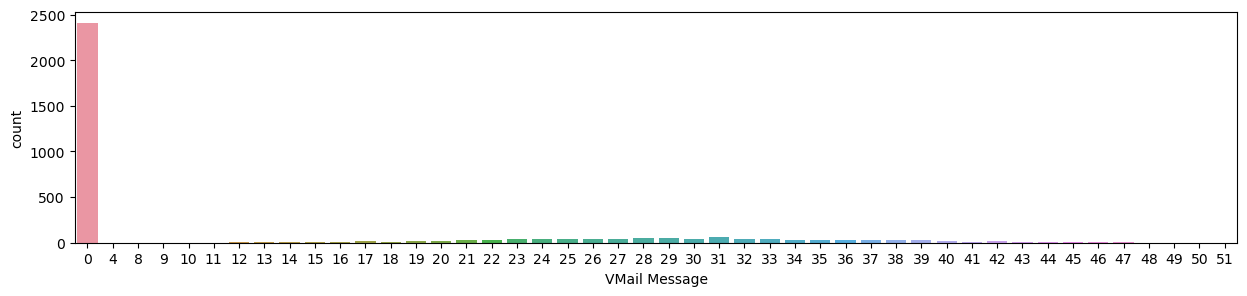

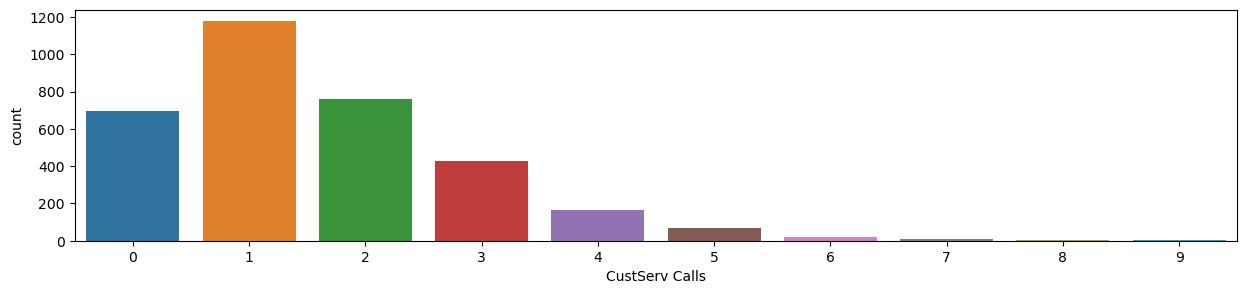

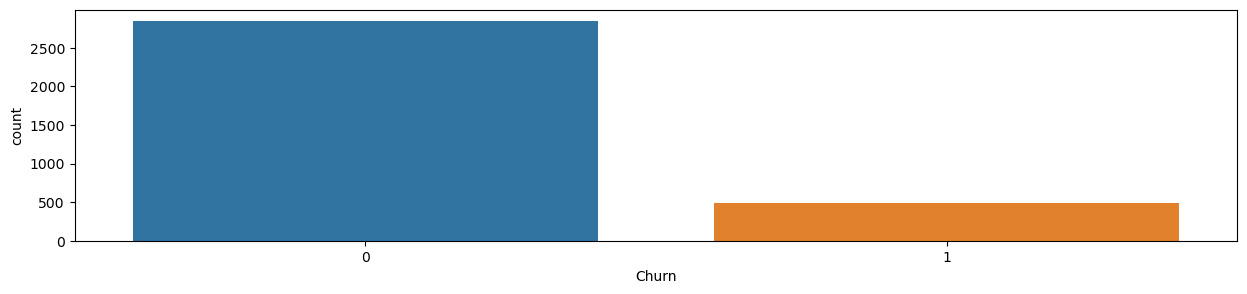

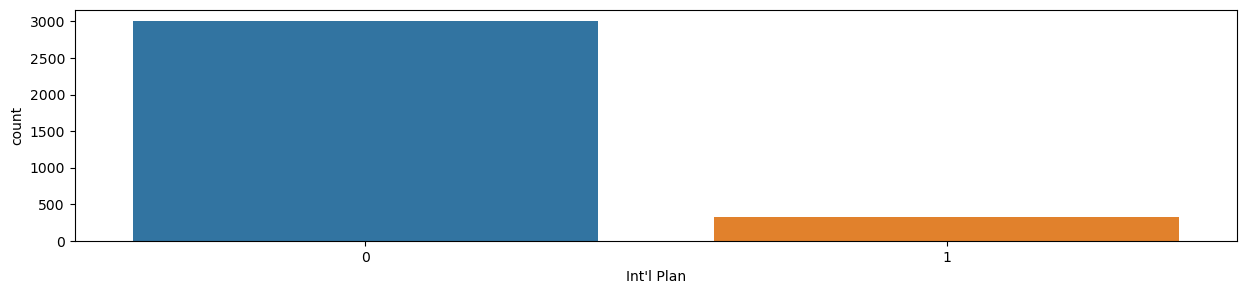

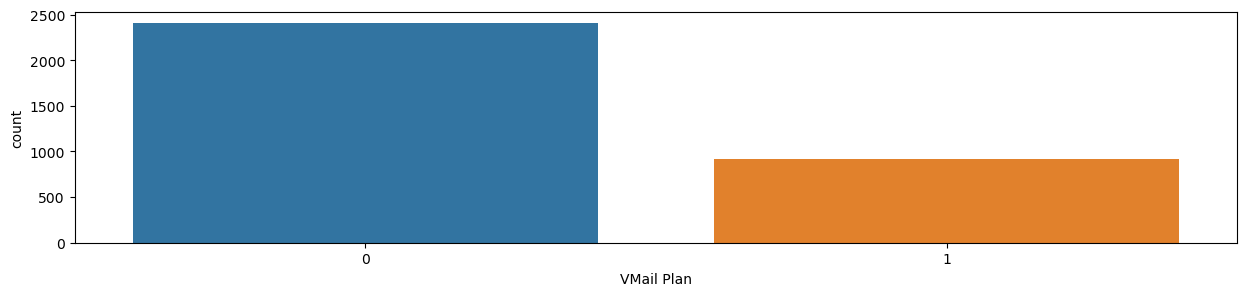

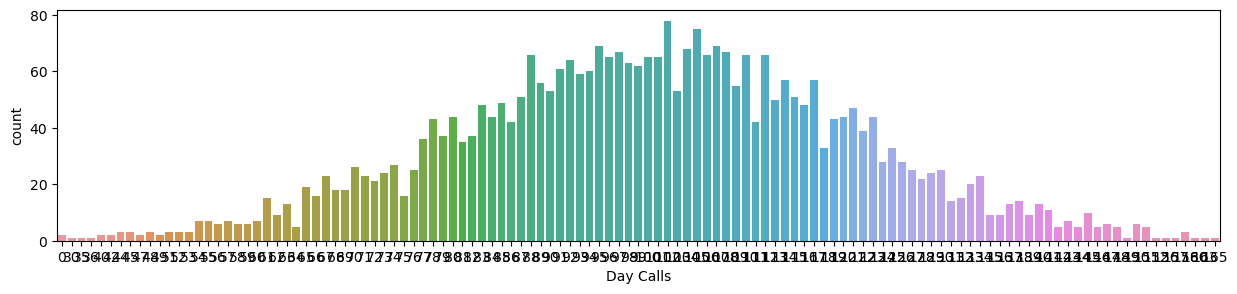

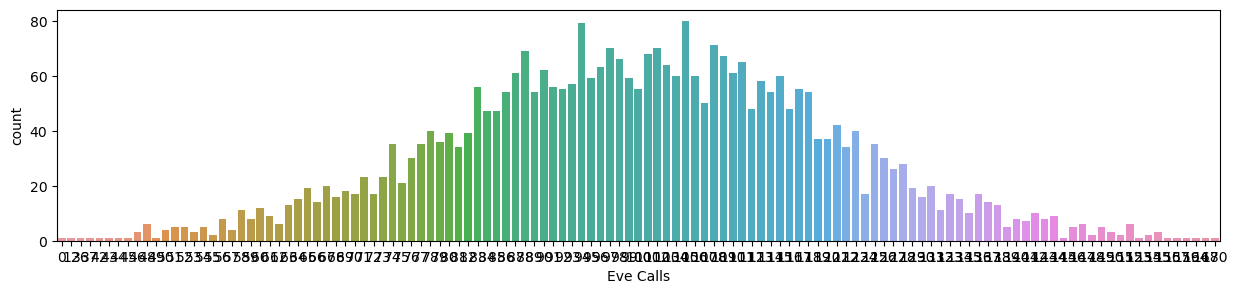

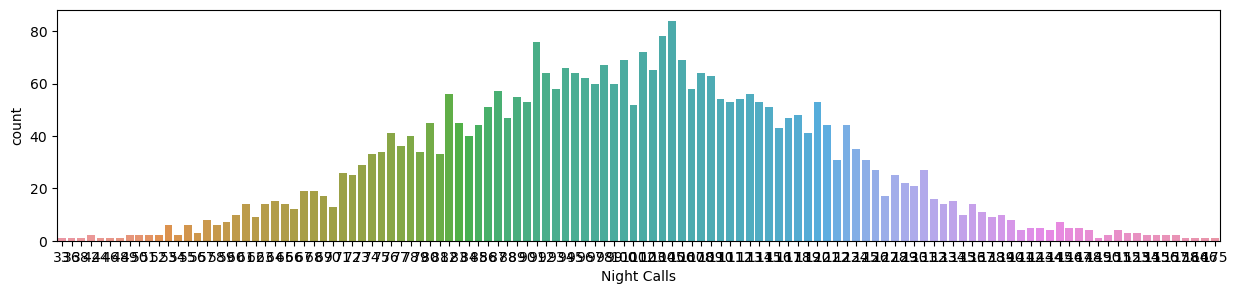

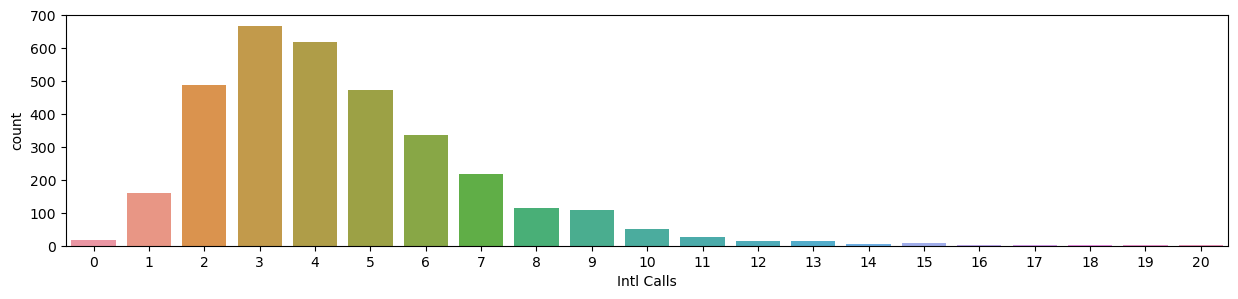

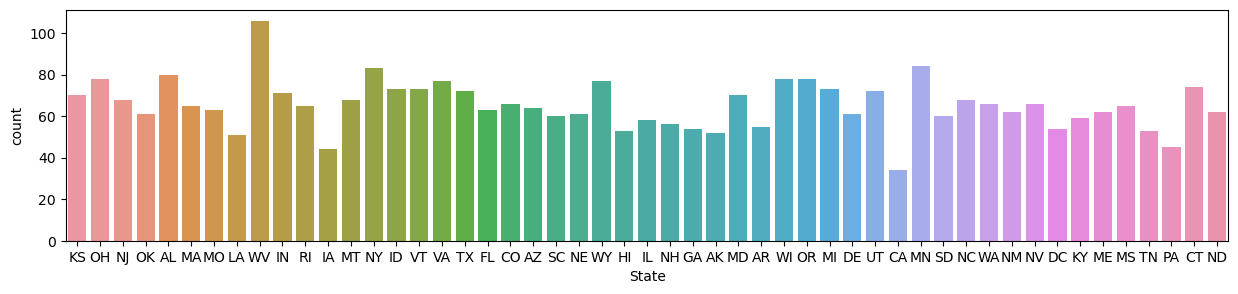

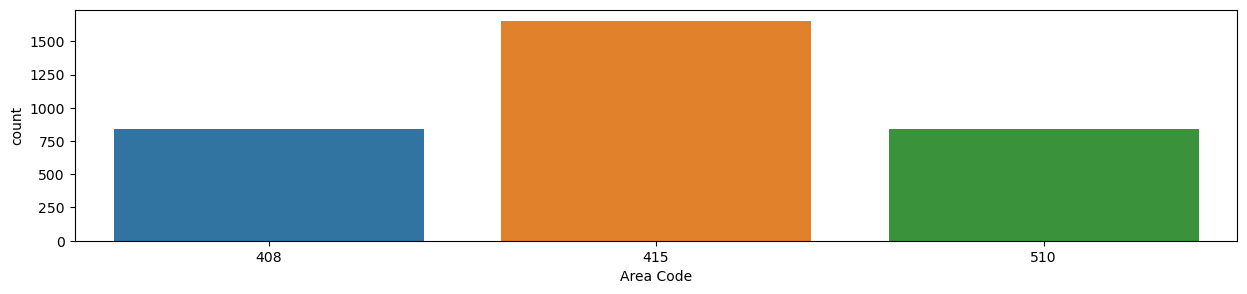

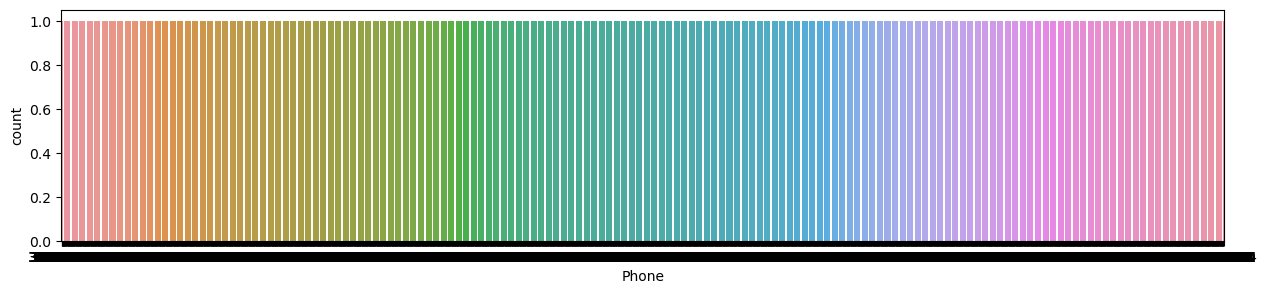

In [59]:
# Count plot for categorical variables
cat_col_name = []
for col_name in data.columns:
    if (data[col_name].dtypes!=int) and (data[col_name].dtypes!=float):
        cat_col_name.append(col_name)
        plt.figure(figsize=(15, 3))
        sns.countplot(x=col_name, data=data)
        plt.show()

In [6]:
data['AreaCode']= data.AreaCode.astype(str)
#data['Churn']= data.Churn.astype(str)

In [8]:
data.isnull().any()

Phone             False
Account Length    False
VMail Message     False
Day Mins          False
Eve Mins          False
Night Mins        False
Intl Mins         False
CustServ Calls    False
Int'l Plan        False
VMail Plan        False
Day Calls         False
Day Charge        False
Eve Calls         False
Eve Charge        False
Night Calls       False
Night Charge      False
Intl Calls        False
Intl Charge       False
State             False
AreaCode          False
Churn             False
dtype: bool

In [9]:
data.isnull().values.sum()

0

In [9]:
data.isnull().values.any()

False

In [10]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

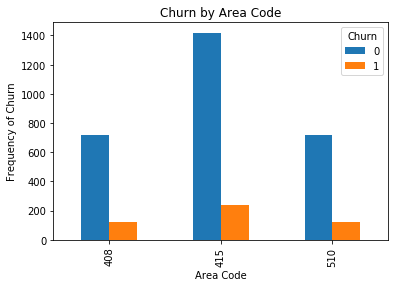

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(data.AreaCode,data.Churn).plot(kind='bar')
plt.title('Churn by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Frequency of Churn')
plt.savefig('Area_wise_bar_chart')

In [11]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data["Area_code"] = lb_make.fit_transform(data["AreaCode"])
data["State_code"] = lb_make.fit_transform(data["State"])


In [12]:
data.shape

(3333, 23)

In [13]:
data.head()

,Phone,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,...,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,AreaCode,Churn,Area_code,State_code
0,382-4657,128,25,265.1,197.4,244.7,10.0,1,0,1,...,16.78,91,11.01,3,2.70,KS,415,0,1,16
1,371-7191,107,26,161.6,195.5,254.4,13.7,1,0,1,...,16.62,103,11.45,3,3.70,OH,415,0,1,35
2,358-1921,137,0,243.4,121.2,162.6,12.2,0,0,0,...,10.30,104,7.32,5,3.29,NJ,415,0,1,31
3,375-9999,84,0,299.4,61.9,196.9,6.6,2,1,0,...,5.26,89,8.86,7,1.78,OH,408,0,0,35
4,330-6626,75,0,166.7,148.3,186.9,10.1,3,1,0,...,12.61,121,8.41,3,2.73,OK,415,0,1,36


In [15]:
d_vars=data.columns.values.tolist()

z=['State','AreaCode', 'Churn']
x1=[i for i in d_vars if i not in z]

In [16]:
print(x1)

['Phone', 'Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', "Int'l Plan", 'VMail Plan', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'Area_code', 'State_code']


In [17]:
cols = ['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', "Int'l Plan", 'VMail Plan', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'Area_code', 'State_code']

In [18]:
x=data[cols]
y=data['Churn']

In [19]:
print(x)

      Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  \
0                128             25     265.1     197.4       244.7   
1                107             26     161.6     195.5       254.4   
2                137              0     243.4     121.2       162.6   
3                 84              0     299.4      61.9       196.9   
4                 75              0     166.7     148.3       186.9   
5                118              0     223.4     220.6       203.9   
6                121             24     218.2     348.5       212.6   
7                147              0     157.0     103.1       211.8   
8                117              0     184.5     351.6       215.8   
9                141             37     258.6     222.0       326.4   
10                65              0     129.1     228.5       208.8   
11                74              0     187.7     163.4       196.0   
12               168              0     128.8     104.9       141.1   
13    

In [20]:
print(y)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      0
12      0
13      0
14      0
15      1
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3303    0
3304    1
3305    0
3306    0
3307    0
3308    0
3309    0
3310    0
3311    0
3312    0
3313    0
3314    0
3315    0
3316    0
3317    0
3318    0
3319    0
3320    1
3321    0
3322    1
3323    1
3324    0
3325    0
3326    0
3327    0
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64


In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split


In [22]:
#Decision Tree model

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [24]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
Preds= DTC.predict(X_test)

In [27]:
X_test.shape

(1000, 19)

In [26]:
Preds

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [28]:
from sklearn.metrics import accuracy_score
print('DT accuracy: {:.3f}'.format(accuracy_score(y_test, DTC.predict(X_test))))

DT accuracy: 0.898


In [29]:

from sklearn.metrics import classification_report
print(classification_report(y_test, DTC.predict(X_test)))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94       862
          1       0.60      0.77      0.68       138

avg / total       0.91      0.90      0.90      1000



Text(0.5,1,'Decision Tree Classification')

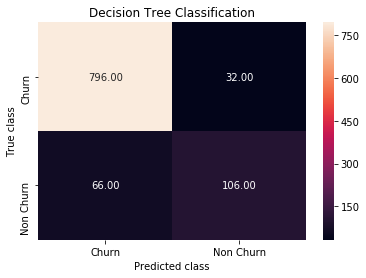

In [28]:
pred = DTC.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Churn", "Non Churn"] , yticklabels = ["Churn", "Non Churn"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree Classification')

In [30]:
preds_df = pd.DataFrame(Preds)
preds_df

,0
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,0
8,0
9,0


In [31]:
preds_df[0].value_counts()

0    824
1    176
Name: 0, dtype: int64

In [32]:
X_test.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area_code,State_code
405,92,0,264.3,160.9,198.6,9.3,0,1,0,91,44.93,115,13.68,73,8.94,5,2.51,1,48
118,112,36,113.7,157.5,177.6,10.0,2,0,1,117,19.33,82,13.39,118,7.99,3,2.70,2,24
710,69,0,195.3,216.7,259.9,12.5,3,0,0,70,33.20,108,18.42,119,11.70,4,3.38,2,42
499,95,0,175.2,244.4,75.8,7.5,1,0,0,91,29.78,109,20.77,95,3.41,2,2.03,1,49
2594,115,0,345.3,203.4,217.5,11.8,1,1,0,81,58.70,106,17.29,107,9.79,8,3.19,2,35


In [33]:
X_test2 = X_test.reset_index

In [34]:
n_pred = X_test2()
n_pred["Preds"] = preds_df
n_pred

,index,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area_code,State_code,Preds
0,405,92,0,264.3,160.9,198.6,9.3,0,1,0,...,44.93,115,13.68,73,8.94,5,2.51,1,48,0
1,118,112,36,113.7,157.5,177.6,10.0,2,0,1,...,19.33,82,13.39,118,7.99,3,2.70,2,24,0
2,710,69,0,195.3,216.7,259.9,12.5,3,0,0,...,33.20,108,18.42,119,11.70,4,3.38,2,42,0
3,499,95,0,175.2,244.4,75.8,7.5,1,0,0,...,29.78,109,20.77,95,3.41,2,2.03,1,49,0
4,2594,115,0,345.3,203.4,217.5,11.8,1,1,0,...,58.70,106,17.29,107,9.79,8,3.19,2,35,1
5,1977,49,0,237.8,208.9,167.8,15.6,2,1,0,...,40.43,119,17.76,86,7.55,6,4.21,1,40,1
6,1892,147,0,225.2,184.9,143.2,9.9,0,1,0,...,38.28,98,15.72,146,6.44,1,2.67,1,48,1
7,1463,87,0,156.8,215.8,223.3,7.6,1,0,0,...,26.66,68,18.34,77,10.05,6,2.05,1,13,0
8,565,97,0,211.0,189.0,123.0,4.7,3,0,0,...,35.87,100,16.07,102,5.54,4,1.27,2,21,0
9,2114,123,0,260.9,168.5,178.3,13.3,3,0,0,...,44.35,103,14.32,91,8.02,5,3.59,0,43,0


In [35]:
y_test2 = y_test.reset_index(drop=True)

In [36]:
y_test2

0      0
1      0
2      0
3      0
4      1
5      1
6      1
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     0
16     0
17     0
18     0
19     0
20     1
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    1
977    1
978    1
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    1
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: Churn, Length: 1000, dtype: int64

In [37]:
n_pred["Actuals"] = y_test2
n_pred

,index,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area_code,State_code,Preds,Actuals
0,405,92,0,264.3,160.9,198.6,9.3,0,1,0,...,115,13.68,73,8.94,5,2.51,1,48,0,0
1,118,112,36,113.7,157.5,177.6,10.0,2,0,1,...,82,13.39,118,7.99,3,2.70,2,24,0,0
2,710,69,0,195.3,216.7,259.9,12.5,3,0,0,...,108,18.42,119,11.70,4,3.38,2,42,0,0
3,499,95,0,175.2,244.4,75.8,7.5,1,0,0,...,109,20.77,95,3.41,2,2.03,1,49,0,0
4,2594,115,0,345.3,203.4,217.5,11.8,1,1,0,...,106,17.29,107,9.79,8,3.19,2,35,1,1
5,1977,49,0,237.8,208.9,167.8,15.6,2,1,0,...,119,17.76,86,7.55,6,4.21,1,40,1,1
6,1892,147,0,225.2,184.9,143.2,9.9,0,1,0,...,98,15.72,146,6.44,1,2.67,1,48,1,1
7,1463,87,0,156.8,215.8,223.3,7.6,1,0,0,...,68,18.34,77,10.05,6,2.05,1,13,0,0
8,565,97,0,211.0,189.0,123.0,4.7,3,0,0,...,100,16.07,102,5.54,4,1.27,2,21,0,0
9,2114,123,0,260.9,168.5,178.3,13.3,3,0,0,...,103,14.32,91,8.02,5,3.59,0,43,0,0


In [38]:
n_pred.shape

(1000, 22)

In [74]:
n_pred.to_csv("Predicted_file.csv")